# COMP-2704: Supervised Machine Learning Term Project

## Data Analysis and Preparation 

### Problem and Use Case Definition
Several external and internal factors we face every day can affect our mental health condition either in a positive or a negative way. Despite our ability to tell what is good for our mental health apart from what is not, being aware of every single aspect and its consequences is not an easy task.

In this use case, we are going to leverage machine learning capabilities to identify positive and negative aspects of our lifes in detail, demonstrating how data science can enhance medical diagnosis by developing a classification model. The goal is to enable earlier detection and provide employees with timely and relevant treatments.

### Dataset Description
We are going to use the `mental_health_dataset`. This dataset comprises 50,000 records capturing various mental health and lifestyle factors. These factors are represented as the feature columns of the data set, which fall into the following categories:
- **Demographic:** This includes each person demographic information such as age, gender, occupation and country.
- **Mental Health Indicators:** This includes features like the stress level, consultation history and medication usage.
- **Lifestyle:** This includes information complementary information such as sleep hours, work hours, physical activity, social media usage and diet quality.
- **Additional Details:** This includes information about external factors such as smoking and alcohol consumption habits categorized into multiple levels.
### Classification Model Considerations.
*If it’s a classification problem, reflect on whether false positives or false negatives carry more weight.*



## Clean the data
### Missing values and Duplicates

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Defining global variables
LABEL = 'Mental_Health_Condition'

In [28]:
df = pd.read_csv('data/mental_health_data final data.csv')
df.head()

,User_ID,Age,Gender,Occupation,Country,Mental_Health_Condition,Severity,Consultation_History,Stress_Level,Sleep_Hours,Work_Hours,Physical_Activity_Hours,Social_Media_Usage,Diet_Quality,Smoking_Habit,Alcohol_Consumption,Medication_Usage
0,1,36,Male,Education,Australia,Yes,NaN,Yes,Low,7.6,46,8,2.2,Healthy,Regular Smoker,Regular Drinker,Yes
1,2,48,Male,Engineering,Other,No,Low,No,Low,6.8,74,2,3.4,Unhealthy,Heavy Smoker,Social Drinker,No
2,3,18,Prefer not to say,Sales,India,No,NaN,Yes,Medium,7.1,77,9,5.9,Healthy,Heavy Smoker,Social Drinker,No
3,4,30,Non-binary,Engineering,Australia,No,Medium,No,Low,6.9,57,4,5.4,Average,Regular Smoker,Regular Drinker,No
4,5,58,Male,IT,USA,Yes,NaN,Yes,High,4.7,45,10,3.3,Unhealthy,Regular Smoker,Non-Drinker,Yes


Getting information about our dataset:

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   User_ID                  50000 non-null  int64  
 1   Age                      50000 non-null  int64  
 2   Gender                   50000 non-null  object 
 3   Occupation               50000 non-null  object 
 4   Country                  50000 non-null  object 
 5   Mental_Health_Condition  50000 non-null  object 
 6   Severity                 24998 non-null  object 
 7   Consultation_History     50000 non-null  object 
 8   Stress_Level             50000 non-null  object 
 9   Sleep_Hours              50000 non-null  float64
 10  Work_Hours               50000 non-null  int64  
 11  Physical_Activity_Hours  50000 non-null  int64  
 12  Social_Media_Usage       50000 non-null  float64
 13  Diet_Quality             50000 non-null  object 
 14  Smoking_Habit         

As we can see, the only column that has null values is the severity column, let;s try to understand why:

In [30]:
print(df['Severity'].value_counts())
print(df['Severity'].isnull().sum())

Severity
Medium    8436
High      8301
Low       8261
Name: count, dtype: int64
25002


In [31]:
df[df['Severity'].isnull()][['Mental_Health_Condition','Severity']]

,Mental_Health_Condition,Severity
0,Yes,NaN
2,No,NaN
4,Yes,NaN
7,Yes,NaN
10,Yes,NaN
...,...,...
49985,No,NaN
49988,No,NaN
49990,No,NaN
49992,No,NaN


As a conclusion, we can see that there is missing information about the severity of the mental health condition (if the individual has one) for almost half the number of rows we have in our dataset. For now, a solution to this problem will be dropping the rows in which that information is missing as we plan to use the severity alongside the mental health condition as the label for our model.

In [32]:
# Filtering out rows with null Severity
df = df[df['Severity'].notnull()]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24998 entries, 1 to 49999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   User_ID                  24998 non-null  int64  
 1   Age                      24998 non-null  int64  
 2   Gender                   24998 non-null  object 
 3   Occupation               24998 non-null  object 
 4   Country                  24998 non-null  object 
 5   Mental_Health_Condition  24998 non-null  object 
 6   Severity                 24998 non-null  object 
 7   Consultation_History     24998 non-null  object 
 8   Stress_Level             24998 non-null  object 
 9   Sleep_Hours              24998 non-null  float64
 10  Work_Hours               24998 non-null  int64  
 11  Physical_Activity_Hours  24998 non-null  int64  
 12  Social_Media_Usage       24998 non-null  float64
 13  Diet_Quality             24998 non-null  object 
 14  Smoking_Habit            24

It makes no sense to have a severity associated with a No mental health condition, so those severities are going to go blank for our next transformation to work properly

In [33]:
df[LABEL].value_counts()

Mental_Health_Condition
Yes    12503
No     12495
Name: count, dtype: int64

In [34]:
df['Mental_Health_Condition'] = df[LABEL].map({'Yes': 'Y', 'No': 'N'})
df['Severity'] = df.apply(lambda row : '' if row[LABEL] == 'N' else row['Severity'], axis = 1)
df

,User_ID,Age,Gender,Occupation,Country,Mental_Health_Condition,Severity,Consultation_History,Stress_Level,Sleep_Hours,Work_Hours,Physical_Activity_Hours,Social_Media_Usage,Diet_Quality,Smoking_Habit,Alcohol_Consumption,Medication_Usage
1,2,48,Male,Engineering,Other,N,,No,Low,6.8,74,2,3.4,Unhealthy,Heavy Smoker,Social Drinker,No
3,4,30,Non-binary,Engineering,Australia,N,,No,Low,6.9,57,4,5.4,Average,Regular Smoker,Regular Drinker,No
5,6,34,Non-binary,Healthcare,Australia,N,,No,Low,5.1,74,4,3.6,Unhealthy,Regular Smoker,Social Drinker,Yes
6,7,24,Non-binary,Engineering,India,Y,Medium,Yes,High,7.1,35,4,6.0,Average,Non-Smoker,Non-Drinker,Yes
8,9,53,Male,Other,USA,N,,No,Low,4.8,62,3,5.7,Unhealthy,Occasional Smoker,Regular Drinker,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,49995,42,Female,Other,UK,Y,High,Yes,High,10.0,60,1,0.5,Average,Regular Smoker,Heavy Drinker,No
49995,49996,44,Prefer not to say,Education,Australia,N,,Yes,High,8.4,45,4,1.3,Unhealthy,Regular Smoker,Regular Drinker,Yes
49997,49998,31,Prefer not to say,Education,India,Y,Low,No,Medium,5.2,61,6,2.1,Average,Non-Smoker,Heavy Drinker,No
49998,49999,26,Prefer not to say,Other,UK,Y,Low,No,High,8.2,59,0,1.9,Healthy,Occasional Smoker,Regular Drinker,Yes


As discussed, now we need to create a new column out of Mental_Health_Condition and Severity, as this is going to be our label.

In [35]:
df[LABEL] = df.apply(lambda row : row[LABEL] + '_' + row['Severity'] 
                     if row[LABEL] == 'Y' else row[LABEL], axis = 1)
df.drop(columns = ['Severity'], inplace=True)
df.head()

,User_ID,Age,Gender,Occupation,Country,Mental_Health_Condition,Consultation_History,Stress_Level,Sleep_Hours,Work_Hours,Physical_Activity_Hours,Social_Media_Usage,Diet_Quality,Smoking_Habit,Alcohol_Consumption,Medication_Usage
1,2,48,Male,Engineering,Other,N,No,Low,6.8,74,2,3.4,Unhealthy,Heavy Smoker,Social Drinker,No
3,4,30,Non-binary,Engineering,Australia,N,No,Low,6.9,57,4,5.4,Average,Regular Smoker,Regular Drinker,No
5,6,34,Non-binary,Healthcare,Australia,N,No,Low,5.1,74,4,3.6,Unhealthy,Regular Smoker,Social Drinker,Yes
6,7,24,Non-binary,Engineering,India,Y_Medium,Yes,High,7.1,35,4,6.0,Average,Non-Smoker,Non-Drinker,Yes
8,9,53,Male,Other,USA,N,No,Low,4.8,62,3,5.7,Unhealthy,Occasional Smoker,Regular Drinker,Yes


This is the dataset we are going to work with.

### Checking duplicates

In [36]:
any(df.duplicated())

False

No duplicates on the data!

In [37]:
df.describe()

,User_ID,Age,Sleep_Hours,Work_Hours,Physical_Activity_Hours,Social_Media_Usage
count,24998.000000,24998.000000,24998.000000,24998.000000,24998.000000,24998.000000
mean,25109.395792,41.472718,7.018721,55.127650,5.011961,3.258065
std,14435.387779,13.886295,1.732755,14.648357,3.160148,1.594494
min,2.000000,18.000000,4.000000,30.000000,0.000000,0.500000
25%,12579.250000,29.000000,5.500000,42.000000,2.000000,1.900000
50%,25218.500000,41.000000,7.000000,55.000000,5.000000,3.300000
75%,37595.250000,54.000000,8.500000,68.000000,8.000000,4.600000
max,50000.000000,65.000000,10.000000,80.000000,10.000000,6.000000


In this step, we are going to use visualization to both understand the data and present it. This will help to validate consistency on the dataset as well.

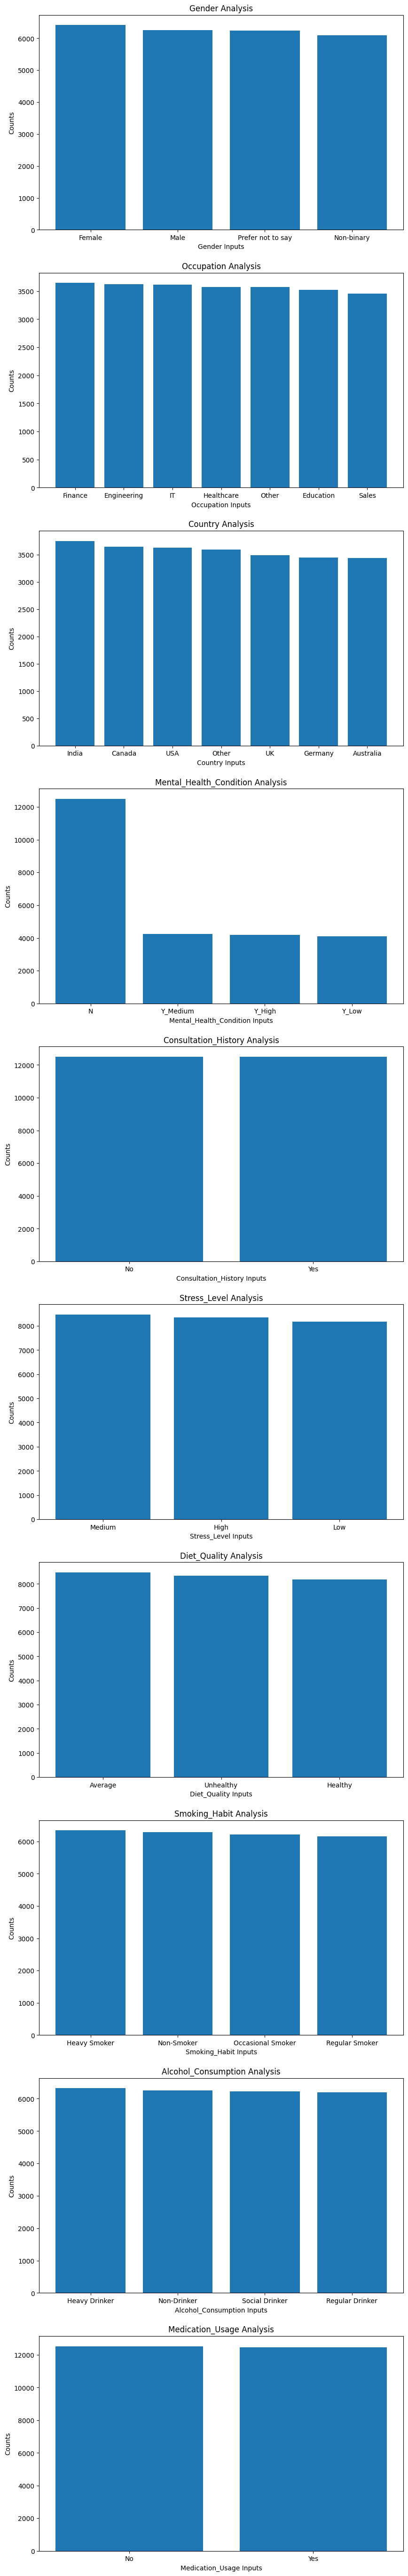

In [38]:
# Value counts analysis
# Non-numerical columns only
columns_to_analyze = df.select_dtypes(exclude='number').columns

fig, axs = plt.subplots(len(columns_to_analyze), 1, figsize=(10, 70))
for i, column in enumerate(columns_to_analyze):
    gender_counts = df[column].value_counts()
    axs[i].bar(gender_counts.index, gender_counts.values)
    axs[i].set_xlabel(f'{column} Inputs')
    axs[i].set_ylabel('Counts')
    axs[i].set_title(f'{column} Analysis')


KeyError: 'species'

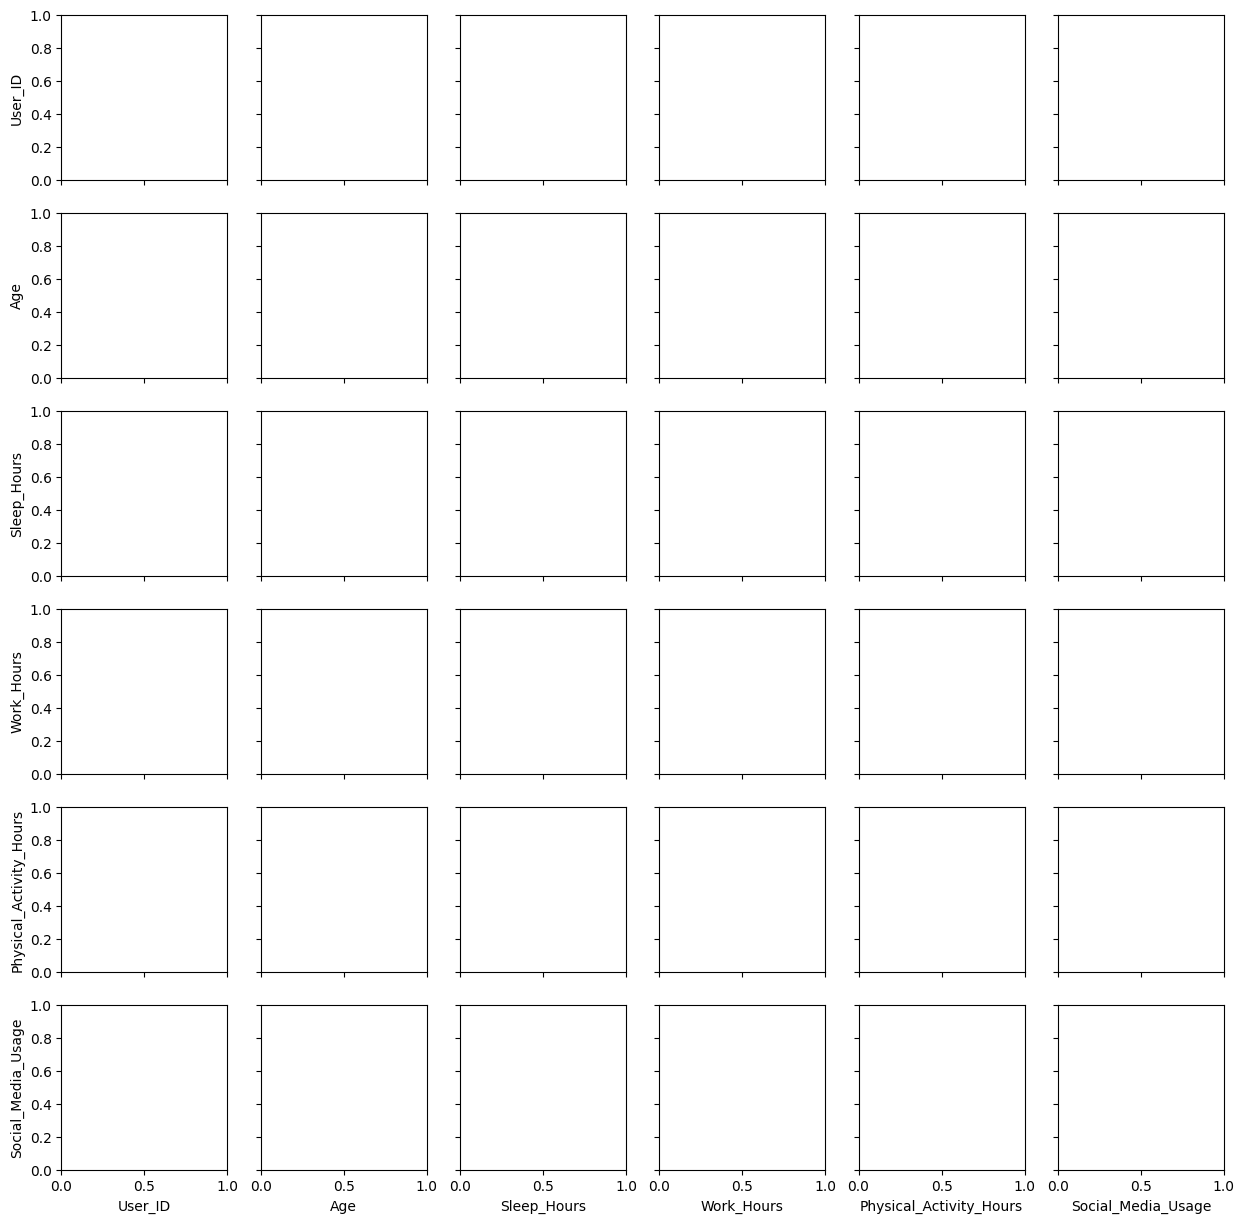

In [39]:
import seaborn as sns
import pandas as pd

# Create pairplot
sns.pairplot(df, hue='species')
